<a href="https://colab.research.google.com/github/Lisankk/Dirisl_Phase2_PJT/blob/Ito_branch/Phase2_%E7%B5%B1%E8%A8%88%E9%87%8F%E3%81%AE%E7%A2%BA%E8%AA%8D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
!pip install japanize-matplotlib
import japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 34.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=e652a63f0190d9eb50a576a8d8ba36a16c7e0a1215a85441620d95bd02e54ae3
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# データの読み込み
df_all = pd.read_csv('/content/drive/MyDrive/all_results_for_coupon_sending.csv')
df_abtest = pd.read_csv('/content/drive/MyDrive/abtest_results_for_coupon_sending.csv')

In [7]:
# データの先頭部分を確認
df_all.head()

,sex,recency,history,mens_product_purchase,womens_product_purchase,area_classification,newbie,channel,segment,visit,conversion,spend
0,女性,3,31671,1,0,郊外,0,スマートフォン,送付あり,1,0,0
1,女性,1,18745,0,1,都会,0,スマートフォン,送付あり,1,0,0
2,男性,5,2999,1,0,郊外,1,スマートフォン,送付あり,1,0,0
3,男性,2,6057,1,0,都会,0,ウェブ,送付あり,1,0,0
4,女性,10,11051,1,0,郊外,1,ウェブ,送付あり,0,0,0


In [8]:
df_abtest.head()

,sex,recency,history,mens_product_purchase,womens_product_purchase,area_classification,newbie,channel,segment,visit,conversion,spend
0,男性,6,32908,1,1,地方,1,ウェブ,送付なし,0,0,0
1,男性,9,67583,1,0,地方,1,ウェブ,送付あり,0,0,0
2,女性,9,67507,1,1,地方,1,スマートフォン,送付あり,0,0,0
3,男性,2,10164,0,1,都会,0,ウェブ,送付あり,1,0,0
4,女性,4,24142,0,1,地方,1,複数,送付なし,0,0,0


In [14]:
# 各データフレームの要約情報を確認
print(df_all.info())
print('-------------------------------------------------')
print(df_abtest.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176000 entries, 0 to 175999
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   sex                      176000 non-null  object
 1   recency                  176000 non-null  int64 
 2   history                  176000 non-null  int64 
 3   mens_product_purchase    176000 non-null  int64 
 4   womens_product_purchase  176000 non-null  int64 
 5   area_classification      176000 non-null  object
 6   newbie                   176000 non-null  int64 
 7   channel                  176000 non-null  object
 8   segment                  176000 non-null  object
 9   visit                    176000 non-null  int64 
 10  conversion               176000 non-null  int64 
 11  spend                    176000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 16.1+ MB
None
-------------------------------------------------
<class 'pandas.core.frame.D

In [9]:
# 各変数の統計量の確認
df_all.describe()

,recency,history,mens_product_purchase,womens_product_purchase,newbie,visit,conversion,spend
count,176000.000000,176000.000000,176000.000000,176000.000000,176000.000000,176000.000000,176000.000000,176000.000000
mean,5.792932,24585.675233,0.573739,0.569460,0.503528,0.623261,0.009131,104.050148
std,3.509167,25715.843792,0.494534,0.495153,0.499989,0.484570,0.095118,1503.138732
min,1.000000,2999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,7042.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,16280.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,9.000000,32783.250000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,12.000000,334593.000000,1.000000,1.000000,1.000000,1.000000,1.000000,49900.000000


In [10]:
df_abtest.describe()

,recency,history,mens_product_purchase,womens_product_purchase,newbie,visit,conversion,spend
count,42613.000000,42613.000000,42613.000000,42613.000000,42613.000000,42613.000000,42613.000000,42613.000000
mean,5.761669,24185.881726,0.552085,0.549527,0.501748,0.472743,0.009129,103.770868
std,3.505422,25657.469003,0.497286,0.497547,0.500003,0.499262,0.095108,1499.644731
min,1.000000,2999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,6450.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,15700.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,9.000000,32520.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,12.000000,334593.000000,1.000000,1.000000,1.000000,1.000000,1.000000,49900.000000


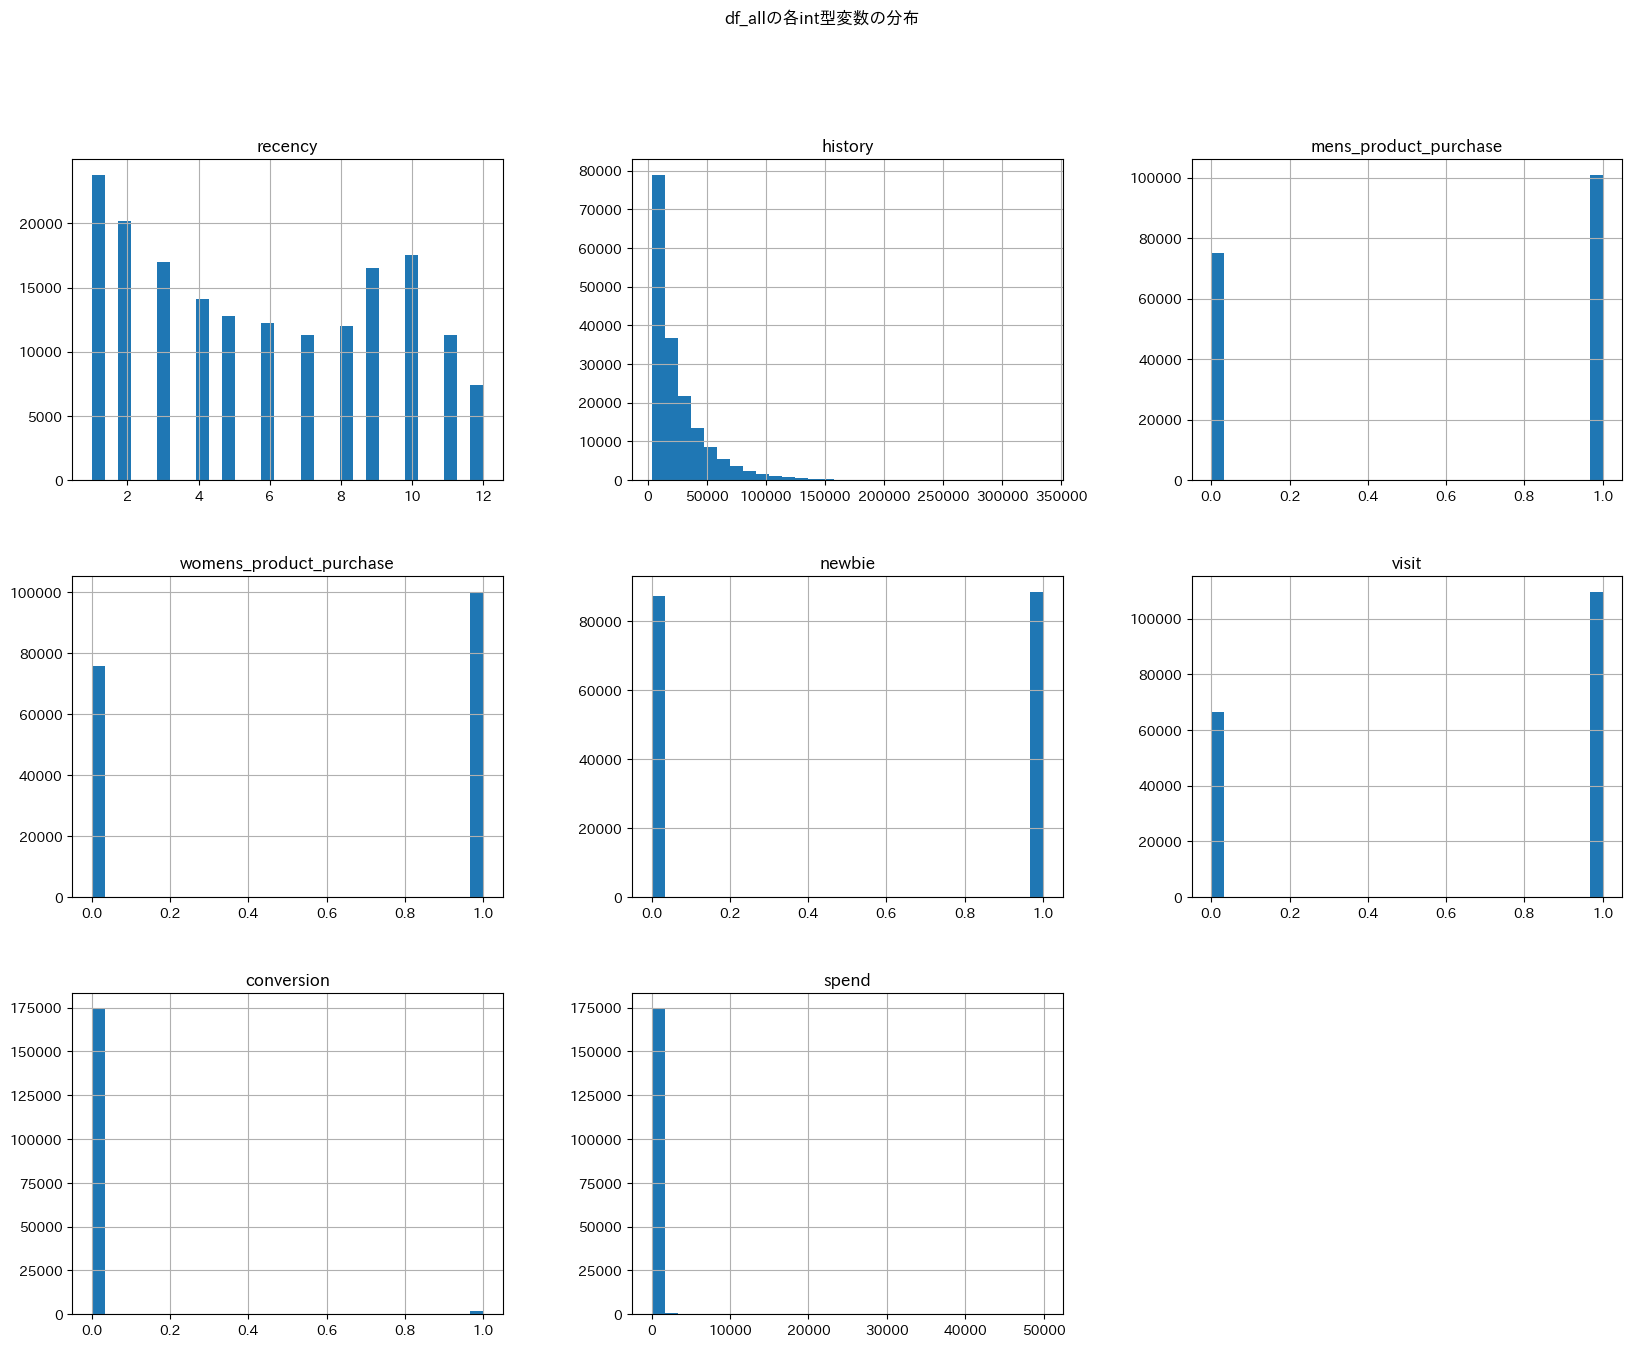

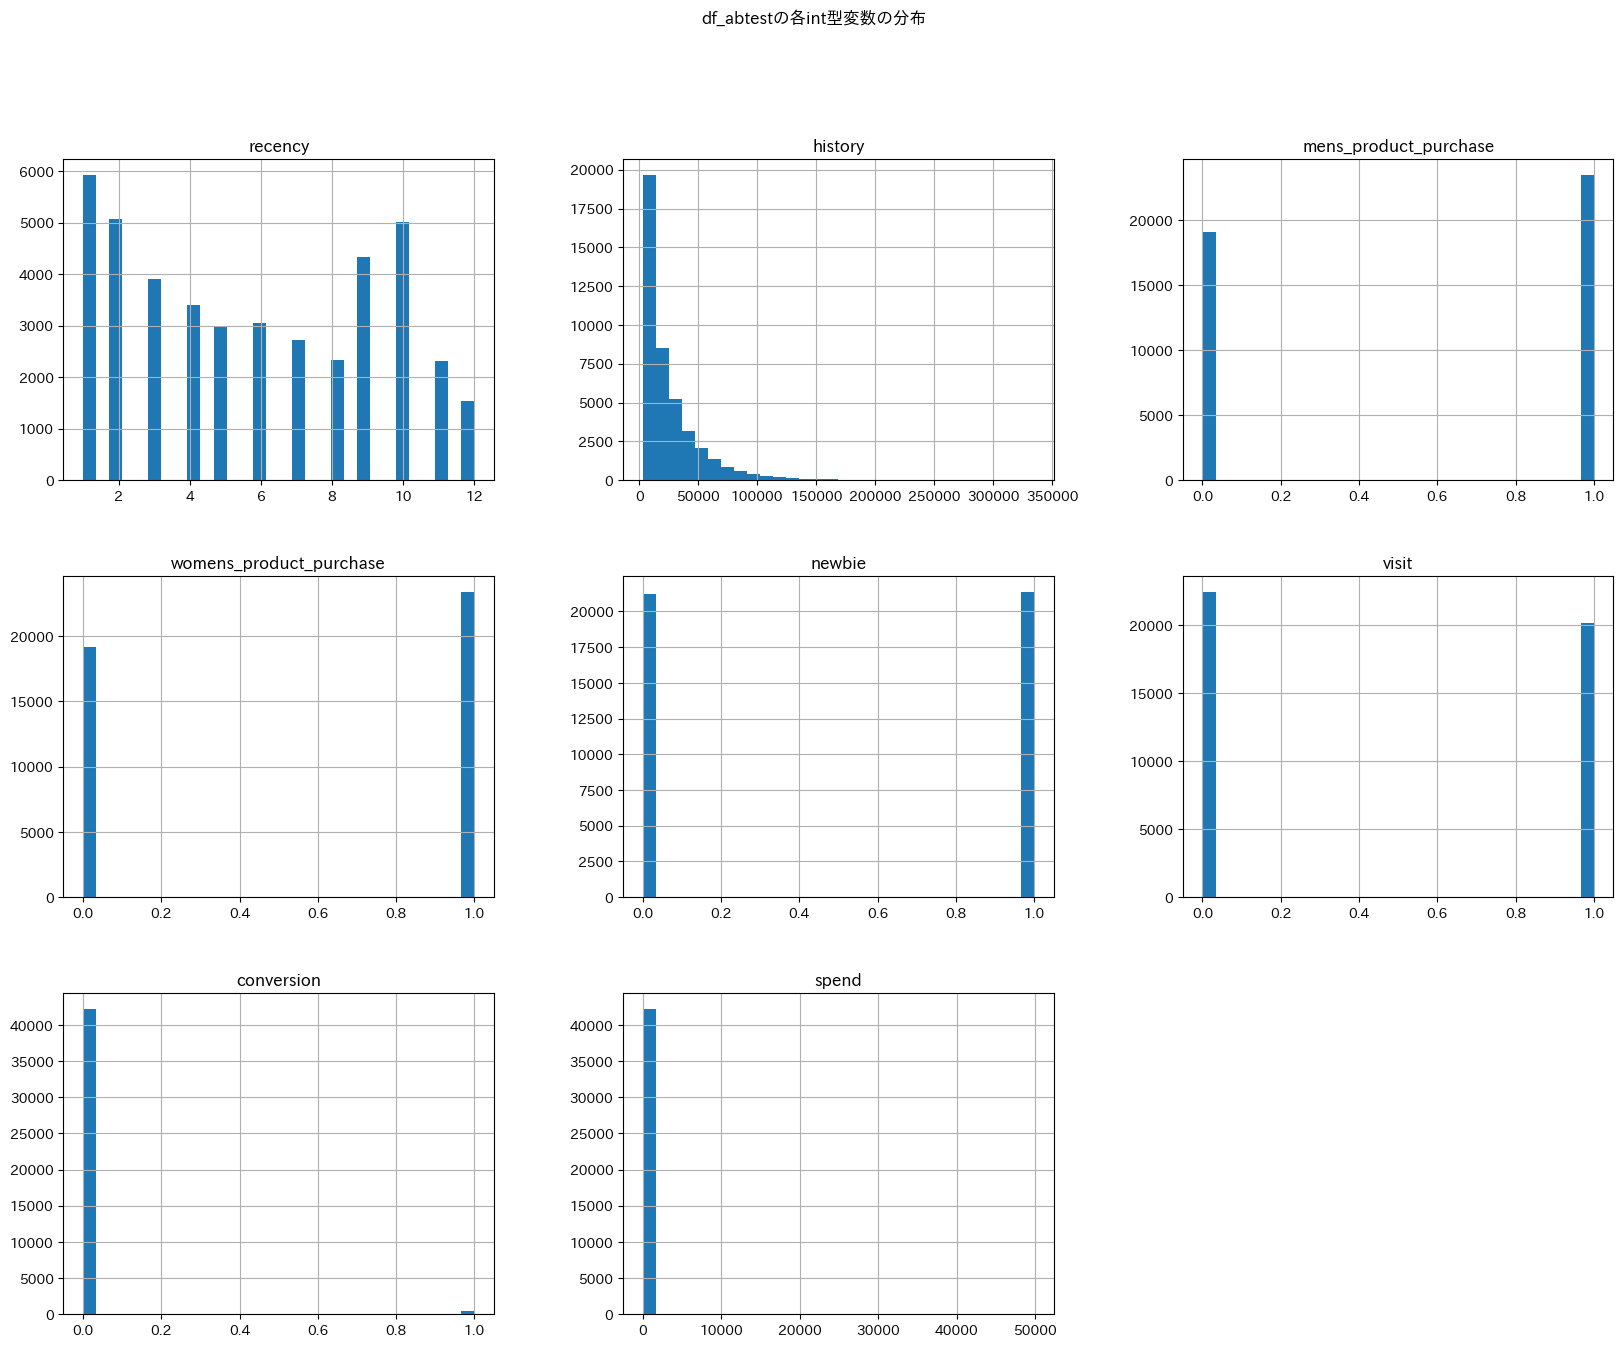

In [18]:
# 各変数の分布の確認

# まずは、int型変数についてヒストグラムで分布の可視化を行う

# df_allのint型変数のヒストグラム
int_columns_all = df_all.select_dtypes(include=['int64']).columns
df_all[int_columns_all].hist(bins=30, figsize=(20, 15))
plt.suptitle('df_allの各int型変数の分布')
plt.show()

# df_abtestのint型変数のヒストグラム
int_columns_abtest = df_abtest.select_dtypes(include=['int64']).columns
df_abtest[int_columns_abtest].hist(bins=30, figsize=(20, 15))
plt.suptitle('df_abtestの各int型変数の分布')
plt.show()

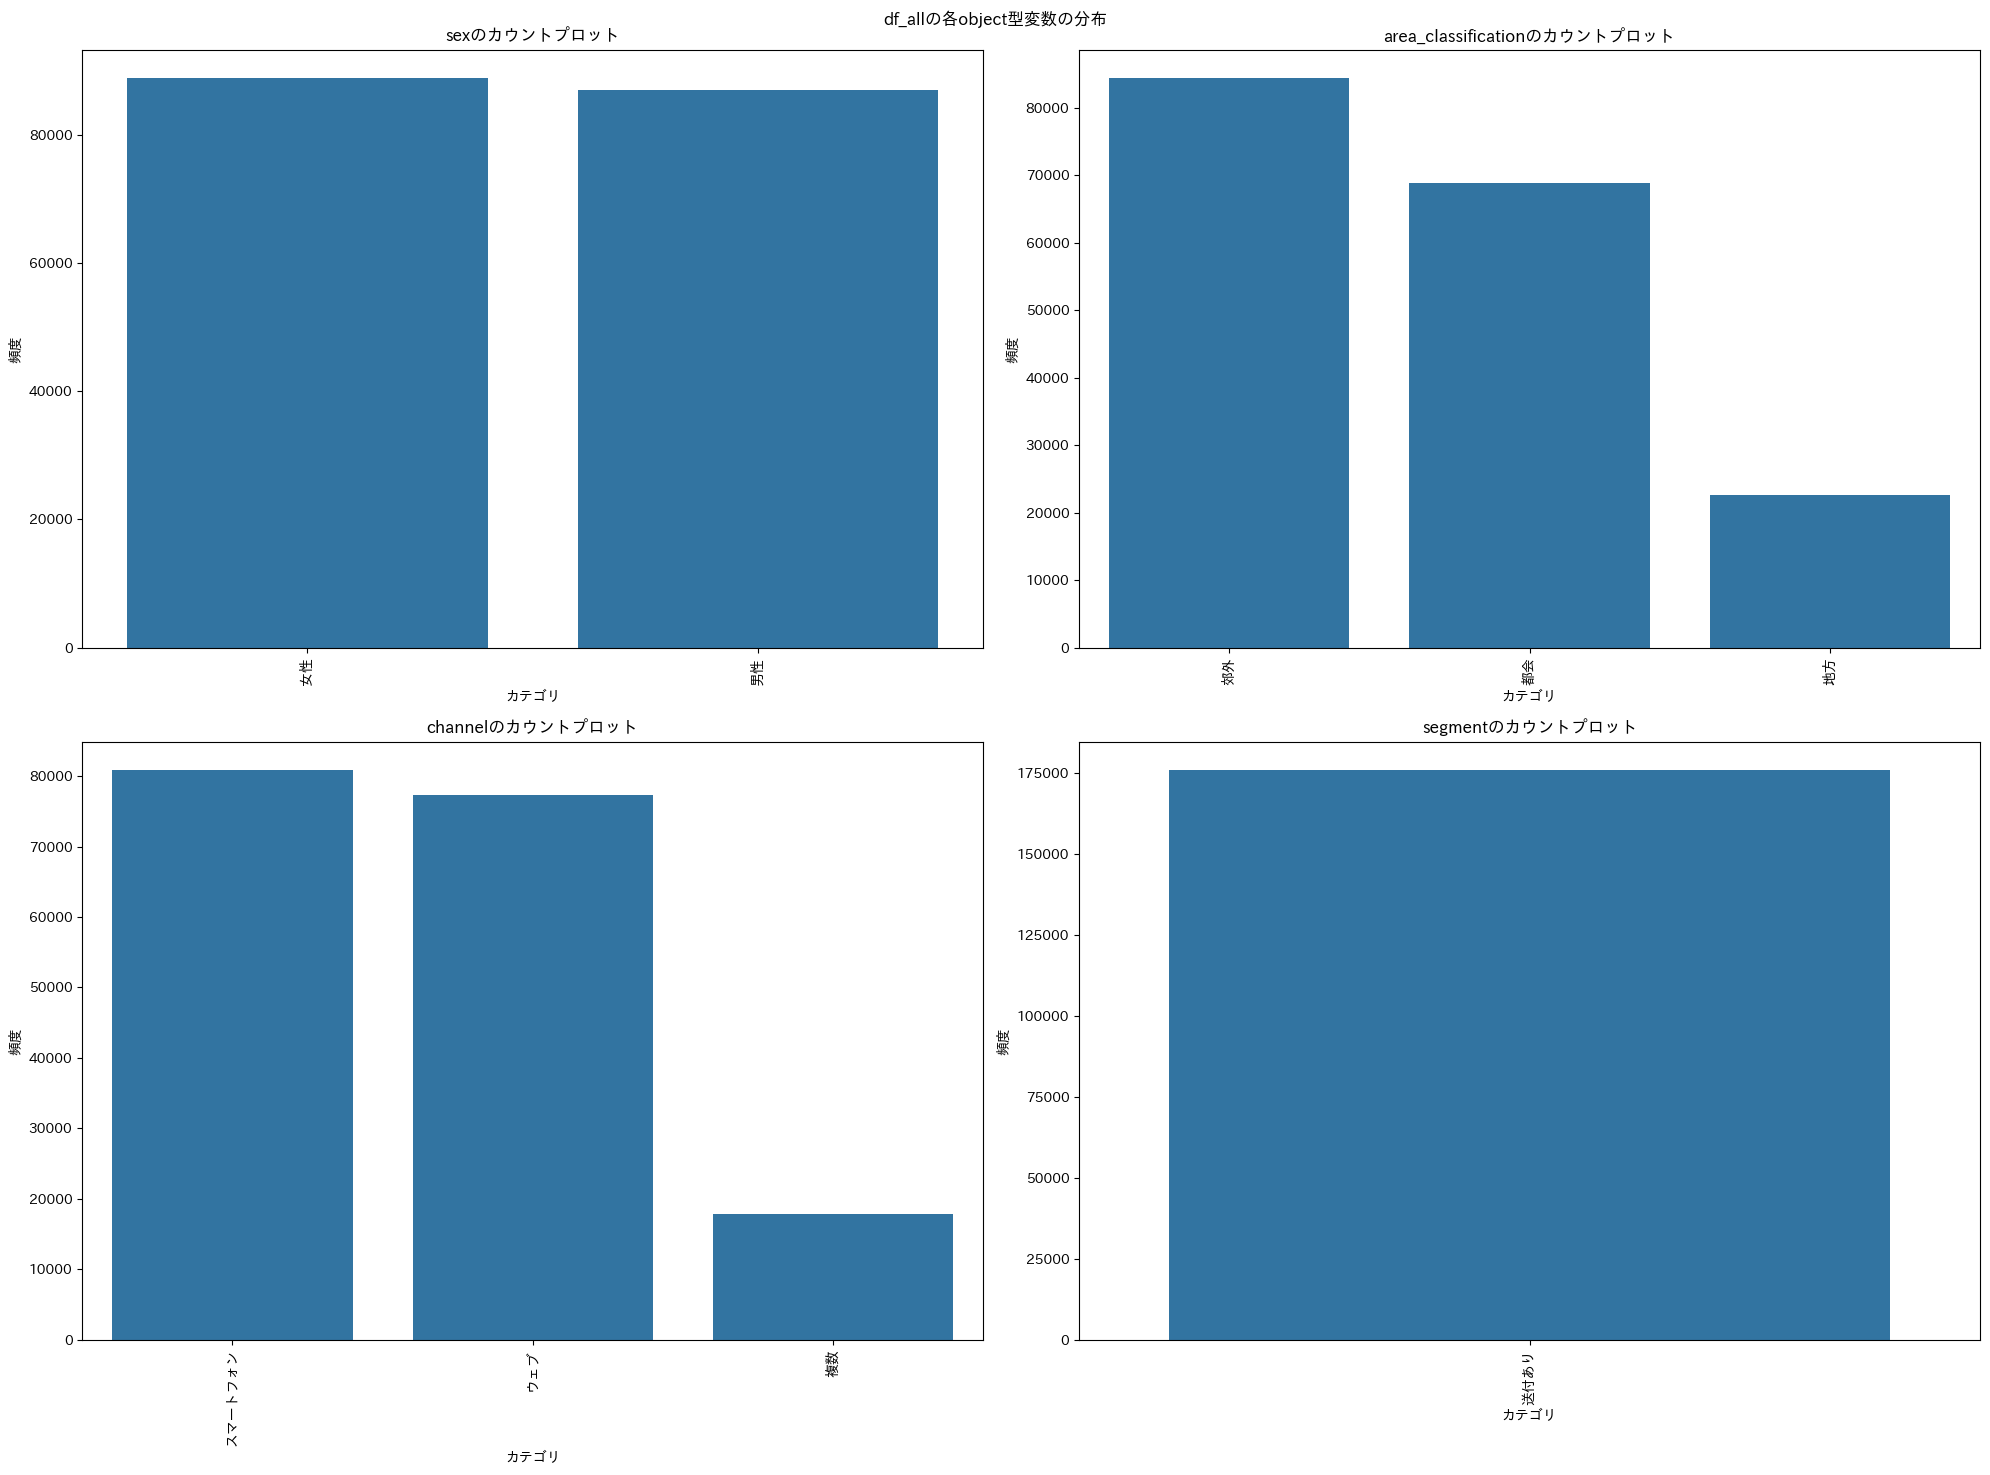

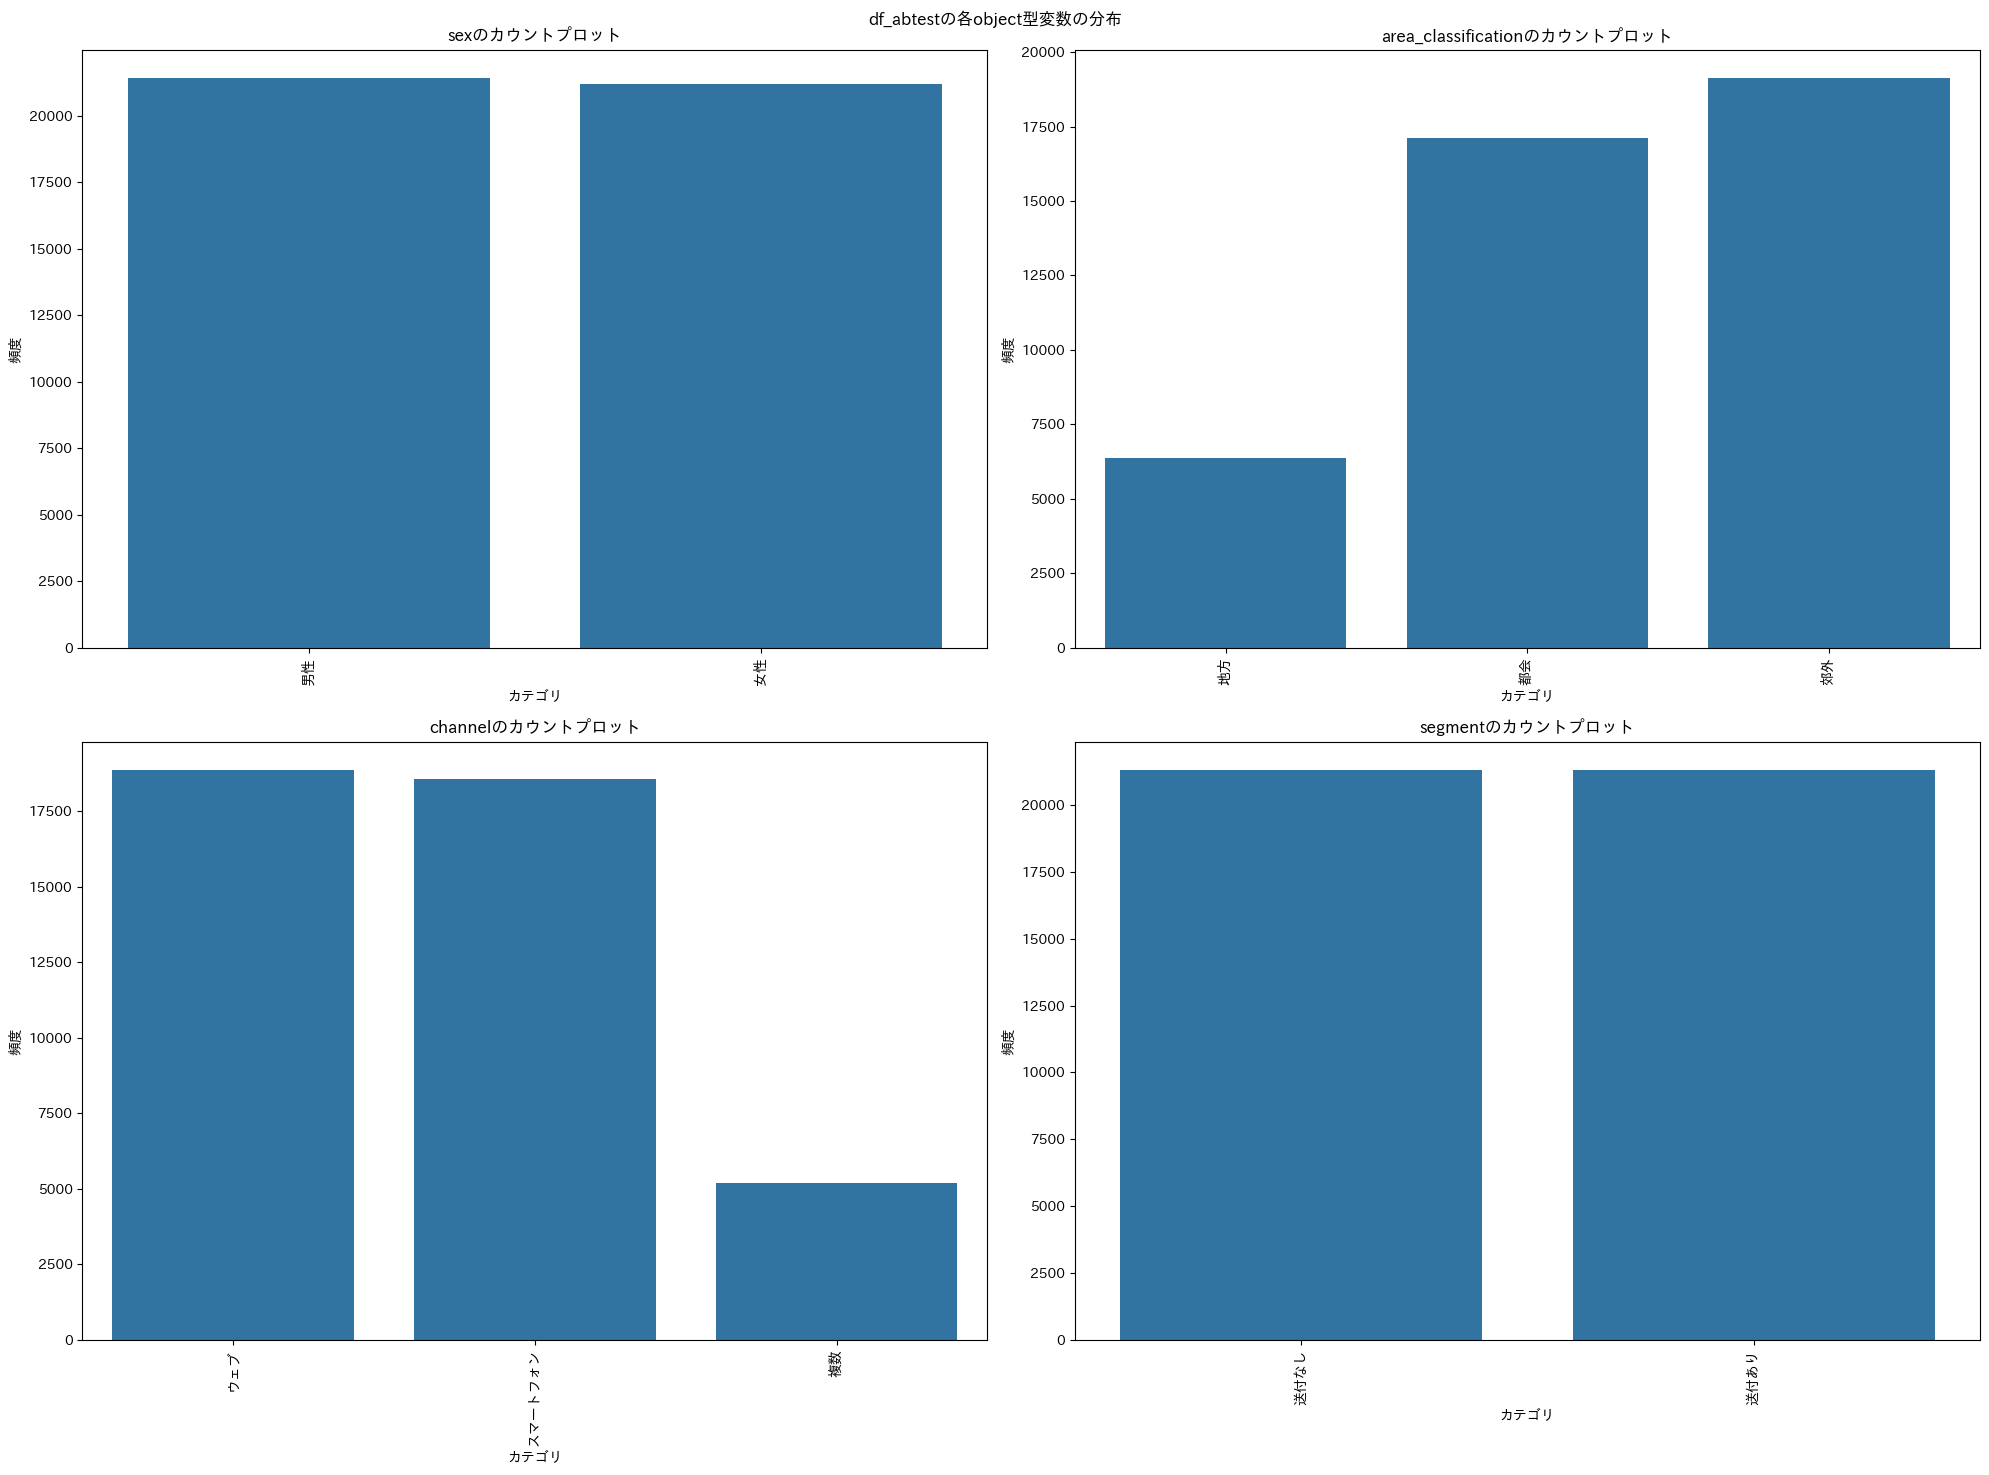

In [27]:
# object型変数についての分布の可視化 (countplotを使用)

# df_allのobject型変数のカウントプロット
object_columns_all = df_all.select_dtypes(include=['object']).columns

# カウントプロットの描画
plt.figure(figsize=(20, 15))
for i, col in enumerate(object_columns_all, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, data=df_all)
    plt.title(f'{col}のカウントプロット')
    plt.xlabel('カテゴリ')
    plt.ylabel('頻度')
    plt.xticks(rotation=90)

plt.suptitle('df_allの各object型変数の分布')
plt.tight_layout()
plt.show()

# df_abtestのobject型変数のカウントプロット
object_columns_abtest = df_abtest.select_dtypes(include=['object']).columns

# カウントプロットの描画
plt.figure(figsize=(20, 15))
for i, col in enumerate(object_columns_abtest, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, data=df_abtest)
    plt.title(f'{col}のカウントプロット')
    plt.xlabel('カテゴリ')
    plt.ylabel('頻度')
    plt.xticks(rotation=90)

plt.suptitle('df_abtestの各object型変数の分布')
plt.tight_layout()
plt.show()

In [36]:
# ABテストの前提の確認

# int型変数について

# 介入群と対照群のデータフレームを定義
treatment_group = df_abtest[df_abtest['segment'] == '送付あり']
control_group = df_abtest[df_abtest['segment'] == '送付なし']

# 各特徴量の平均値を確認
treatment_means = treatment_group[int_columns_abtest].mean()
control_means = control_group[int_columns_abtest].mean()

# 平均値の比較
comparison = pd.DataFrame({'介入群の平均': treatment_means, '対照群の平均': control_means})
print(comparison)

print('--------------------------------------------------------------')

# t検定による有意差の確認
from scipy.stats import ttest_ind

for column in int_columns_abtest:
    t_stat, p_value = ttest_ind(treatment_group[column], control_group[column], nan_policy='omit')
    print(f'{column}: p-value = {p_value}')

                               介入群の平均        対照群の平均
recency                      5.773642      5.749695
history                  24283.541794  24088.217075
mens_product_purchase        0.550946      0.553224
womens_product_purchase      0.551415      0.547639
newbie                       0.501525      0.501971
visit                        0.625194      0.320285
conversion                   0.012531      0.005726
spend                      142.261135     65.278795
--------------------------------------------------------------
recency: p-value = 0.48074331616774213
history: p-value = 0.4320203322119722
mens_product_purchase: p-value = 0.6362421249906982
womens_product_purchase: p-value = 0.4334622355702862
newbie: p-value = 0.9266534965453761
visit: p-value = 0.0
conversion: p-value = 1.4988265260257047e-13
spend: p-value = 1.1633157276386478e-07


In [38]:
# カテゴリ変数について

from scipy.stats import chi2_contingency

# 介入群と対照群のデータフレームを定義
treatment_group = df_abtest[df_abtest['segment'] == '送付あり']
control_group = df_abtest[df_abtest['segment'] == '送付なし']

# カテゴリカル変数の頻度分布の比較とカイ二乗検定
for column in object_columns_abtest:
    contingency_table = pd.crosstab(df_abtest[column], df_abtest['segment'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f'{column}: p-value = {p}')

sex: p-value = 0.2631325914669494
area_classification: p-value = 0.2830226326656388
channel: p-value = 0.5231947749715986
segment: p-value = 0.0
